In [1]:
%matplotlib inline
import math
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import  statsmodels.api as sm 
import torch
from d2l import torch as d2l

## Generate Synthetic data 

In [2]:
# help(d2l.SyntheticRegressionData)

In [3]:
synthetic_data_weights = torch.tensor([2, -3.4, 1, -8, 4, 3, -9, 1,  2, -6])
synthetic_data_b = 4.2
num_dim =  synthetic_data_weights.shape[0]

In [4]:
num_dim

10

In [5]:
data = d2l.SyntheticRegressionData(w=synthetic_data_weights, 
                                   b=synthetic_data_b,
                                  num_train=1000,
                                  num_val=1000,
                                  batch_size=100,
                                  noise=0.5)

In [6]:
data.X = data.X[:,:8]
num_dim =  data.X.shape[1]

In [7]:
data.y.shape

torch.Size([2000, 1])

## Linear regression using sklearn 

In [8]:
nX = data.X.detach().numpy()
ny = data.y.detach().numpy()

In [9]:
sk_model = LinearRegression()
sk_model.fit(nX, ny)

LinearRegression()

In [10]:
sk_model.coef_, sk_model.intercept_

(array([[ 1.9236457, -3.6999865,  1.2425767, -8.167717 ,  4.4256544,
          3.166382 , -9.000423 ,  1.1013795]], dtype=float32),
 array([4.2763476], dtype=float32))

## Linear regression using statsmodels

In [11]:
sm_mdl = sm.OLS(endog=ny, exog=sm.add_constant(nX)).fit()

In [12]:
sm_mdl.params

array([ 4.27634729,  1.9236438 , -3.69998749,  1.24257804, -8.16771705,
        4.4256558 ,  3.16637711, -9.00041481,  1.10137673])

## Linear Regression from scratch 

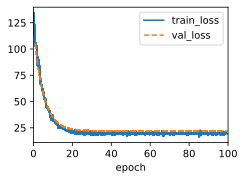

In [22]:
model_scratch = d2l.LinearRegressionScratch(num_inputs=num_dim, lr=0.01)
trainer = d2l.Trainer(max_epochs=100)
trainer.fit(model_scratch, data)

In [23]:
model_scratch.w, model_scratch.b

(tensor([[ 2.0223],
         [-3.5198],
         [ 1.3093],
         [-8.2469],
         [ 4.1154],
         [ 2.9787],
         [-9.0178],
         [ 1.4445]], requires_grad=True),
 tensor([4.3288], requires_grad=True))

## Linear Regression based on pytorch

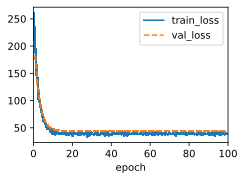

In [20]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=100)
trainer.fit(model, data)

In [21]:
model.get_w_b()

(tensor([[ 2.0183, -3.5204,  1.3128, -8.2564,  4.1230,  2.9812, -9.0143,  1.4444]]),
 tensor([4.3453]))